In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv("/content/gdrive/My Drive/EDA_이창현/mise_fin.csv",encoding = 'ms949')
df.head(3)

,Unnamed: 0,시도,측정일시,Unnamed: 0.1,CO,NO2,O3,PM10,PM25,SO2,망,주소,지역,측정소명,측정소코드,연도,월,일,시간,PM10group,PM25group,날짜,날짜2,요일,주말여부
0,0,광주,2016010111,307954,1.5,0.046,0.024,84.0,65.0,0.006,NaN,광주 서구 상무자유로 170,광주 서구,치평동,324155,2016,1,1,11,1.0,1.0,20160101,2016-01-01,4,평일
1,1,광주,2016010211,307978,1.5,0.058,0.030,83.0,54.0,0.005,NaN,광주 서구 상무자유로 170,광주 서구,치평동,324155,2016,1,2,11,1.0,1.0,20160102,2016-01-02,5,주말
2,2,광주,2016010311,308002,2.2,0.058,0.012,104.0,57.0,0.007,NaN,광주 서구 상무자유로 170,광주 서구,치평동,324155,2016,1,3,11,1.0,1.0,20160103,2016-01-03,6,주말


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 25 columns):
Unnamed: 0      7672 non-null int64
시도              7672 non-null object
측정일시            7672 non-null int64
Unnamed: 0.1    7672 non-null int64
CO              7672 non-null float64
NO2             7672 non-null float64
O3              7672 non-null float64
PM10            7672 non-null float64
PM25            7671 non-null float64
SO2             7672 non-null float64
망               1288 non-null object
주소              7672 non-null object
지역              7672 non-null object
측정소명            7672 non-null object
측정소코드           7672 non-null int64
연도              7672 non-null int64
월               7672 non-null int64
일               7672 non-null int64
시간              7672 non-null int64
PM10group       7672 non-null float64
PM25group       7671 non-null float64
날짜              7672 non-null int64
날짜2             7672 non-null object
요일              7672 non-null int64
주말여부   

In [0]:
date = df['측정일시'].astype(str)
df['연도월'] = date.str.slice(start=0, stop=6).astype(str)

In [6]:
df.head(3)

,Unnamed: 0,시도,측정일시,Unnamed: 0.1,CO,NO2,O3,PM10,PM25,SO2,망,주소,지역,측정소명,측정소코드,연도,월,일,시간,PM10group,PM25group,날짜,날짜2,요일,주말여부,연도월
0,0,광주,2016010111,307954,1.5,0.046,0.024,84.0,65.0,0.006,NaN,광주 서구 상무자유로 170,광주 서구,치평동,324155,2016,1,1,11,1.0,1.0,20160101,2016-01-01,4,평일,201601
1,1,광주,2016010211,307978,1.5,0.058,0.030,83.0,54.0,0.005,NaN,광주 서구 상무자유로 170,광주 서구,치평동,324155,2016,1,2,11,1.0,1.0,20160102,2016-01-02,5,주말,201601
2,2,광주,2016010311,308002,2.2,0.058,0.012,104.0,57.0,0.007,NaN,광주 서구 상무자유로 170,광주 서구,치평동,324155,2016,1,3,11,1.0,1.0,20160103,2016-01-03,6,주말,201601


In [5]:
df.columns

Index(['Unnamed: 0', '시도', '측정일시', 'Unnamed: 0.1', 'CO', 'NO2', 'O3', 'PM10',
       'PM25', 'SO2', '망', '주소', '지역', '측정소명', '측정소코드', '연도', '월', '일', '시간',
       'PM10group', 'PM25group', '날짜', '날짜2', '요일', '주말여부', '연도월'],
      dtype='object')

In [0]:
df0 = df[['시도','연도월','연도','월','일','PM10','PM25']]

In [8]:
df0.loc[df0['PM10']>80,'PM10그룹']='BAD_10'
df0.loc[df0['PM10']<=80,'PM10그룹']='GOOD_10'
df0.loc[df0['PM10']>150,'PM10그룹']='VeryBad_10'
df0['PM10그룹'].value_counts()

df0.loc[df0['PM25']>35,'PM25그룹']='BAD_25'
df0.loc[df0['PM25']<=35,'PM25그룹']='GOOD_25'
df0.loc[df0['PM25']>75,'PM25그룹']='VeryBad_25'
df0['PM25그룹'].value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


GOOD_25       4080
BAD_25        3028
VeryBad_25     563
Name: PM25그룹, dtype: int64

In [12]:
df0.head(3)

,시도,연도월,연도,월,일,PM10,PM25,PM10그룹,PM25그룹
0,광주,201601,2016,1,1,84.0,65.0,BAD_10,BAD_25
1,광주,201601,2016,1,2,83.0,54.0,BAD_10,BAD_25
2,광주,201601,2016,1,3,104.0,57.0,BAD_10,BAD_25


In [0]:
df0.to_csv('/content/gdrive/My Drive/EDA_이창현/today2.csv') 

In [0]:
import rpy2
%load_ext rpy2.ipython

In [17]:
%%R
today <- read.csv('/content/gdrive/My Drive/EDA_이창현/today2.csv')
head(today)

  X 시도 연도월 연도 월 일 PM10 PM25   PM10그룹   PM25그룹
1 0 광주 201601 2016  1  1   84   65     BAD_10     BAD_25
2 1 광주 201601 2016  1  2   83   54     BAD_10     BAD_25
3 2 광주 201601 2016  1  3  104   57     BAD_10     BAD_25
4 3 광주 201601 2016  1  4  168  127 VeryBad_10 VeryBad_25
5 4 광주 201601 2016  1  5   47   27    GOOD_10    GOOD_25
6 5 광주 201601 2016  1  6   92   40     BAD_10     BAD_25


In [22]:
%%R
today0 <- today[today$시도=='대전' & today$연도=='2018',]
head(today0)

        X 시도 연도월 연도 월 일 PM10 PM25 PM10그룹 PM25그룹
2924 2923 대전 201801 2018  1  1   62   32  GOOD_10  GOOD_25
2925 2924 대전 201801 2018  1  2   96   75   BAD_10   BAD_25
2926 2925 대전 201801 2018  1  3   85   29   BAD_10  GOOD_25
2927 2926 대전 201801 2018  1  4  101   41   BAD_10   BAD_25
2928 2927 대전 201801 2018  1  5   91   51   BAD_10   BAD_25
2929 2928 대전 201801 2018  1  6   70   41  GOOD_10   BAD_25


In [0]:
%%R
today0$PM10그룹 <- factor(today0$PM10그룹)
today0$PM25그룹 <- factor(today0$PM25그룹)

In [0]:
%%R
table1 <- with(today0,table(연도월,PM10그룹))
table2 <- with(today0,table(연도월,PM25그룹))
table0 <- cbind(table1,table2)

In [26]:
%%R
head(table0)

       BAD_10 GOOD_10 VeryBad_10 BAD_25 GOOD_25 VeryBad_25
201801     12      17          2     14      12          5
201802     12      14          2     13      12          3
201803     11      17          3     11      14          6
201804     14      14          2     12      18          0
201805      9      22          0      9      22          0
201806      5      25          0      6      24          0


In [0]:
#%%R
#table0 <- table0[,-4]

In [27]:
%%R
install.packages('ca')
library(ca)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/ca_0.71.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 46919 bytes (45 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-pack

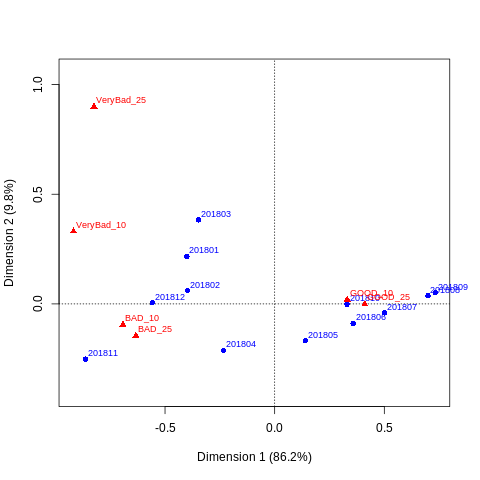

In [28]:
%%R
fit=ca(table0)
plot(fit)

In [0]:
%%R
table0

   BAD_10 GOOD_10 VeryBad_10 BAD_25 GOOD_25 VeryBad_25
1      12      17          2     14      12          5
2      12      14          2     13      12          3
3      11      17          3     11      14          6
4      14      14          2     12      18          0
5       9      22          0      9      22          0
6       5      25          0      6      24          0
7       1      30          0      6      25          0
8       0      31          0      1      30          0
9       0      30          0      0      30          0
10      4      27          0      7      23          1
11     17      11          2     25       3          2
12     16      12          3     16      12          3


In [0]:
%%R
test <- with(today,table(today$PM25그룹,today$PM10그룹))
head(test)

            
             BAD_10 GOOD_10 VeryBad_10
                  0       1          0
  BAD_25       1735    1190        103
  GOOD_25       340    3717         23
  VeryBad_25    363       0        200


In [0]:
%%R
install.packages('ca')
library(ca)
my_ca <- function(name,year){    
    today <- read.csv('/content/gdrive/My Drive/EDA_이창현/today.csv')
    today0 <- today[today$시도==name & today$연도==year,]
    today0$PM10그룹 <- factor(today0$PM10그룹)
    today0$PM25그룹 <- factor(today0$PM25그룹)
    table1 <- with(today0,table(월,PM10그룹))
    table2 <- with(today0,table(월,PM25그룹))
    table0 <- cbind(table1,table2)
    fit=ca(table0)
    plot(fit,main=paste(name,year, 'plot'))
}

In [0]:
%%R
my_ca2 <- function(name){    
    today <- read.csv('/content/gdrive/My Drive/EDA_이창현/today2.csv')
    today0 <- today[today$시도==name,]
    today0$PM10그룹 <- factor(today0$PM10그룹)
    today0$PM25그룹 <- factor(today0$PM25그룹)
    table1 <- with(today0,table(연도월,PM10그룹))
    table2 <- with(today0,table(연도월,PM25그룹))
    table0 <- cbind(table1,table2)
    fit=ca(table0)
    plot(fit,main=paste(name, 'plot'))
}

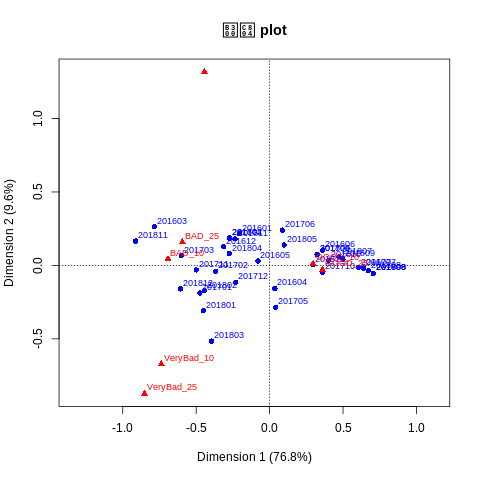

In [44]:
%%R
my_ca2('대전')


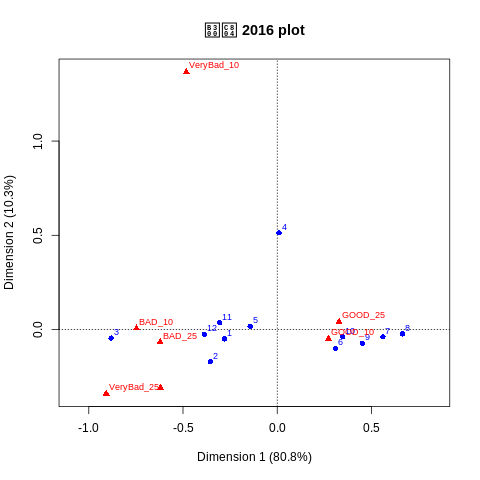

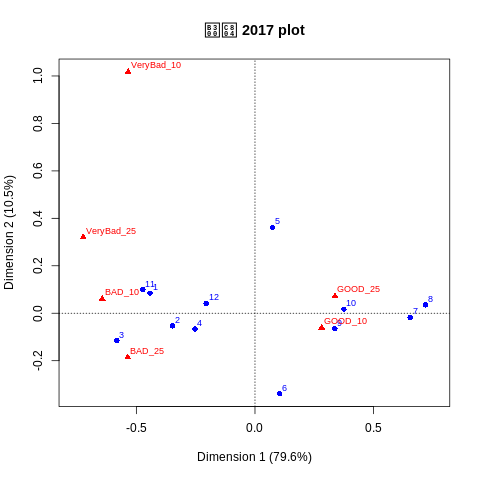

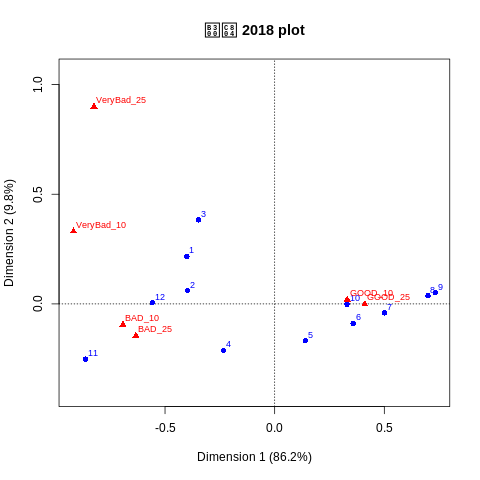

In [40]:
%%R
my_ca('대전',2016)
my_ca('대전',2017)
my_ca('대전',2018)